In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A simple function to load data.

In [2]:
# import training data 
def load_data(csvname):
    # load in data
    data = np.asarray(pd.read_csv(csvname))

    # import data and reshape appropriately
    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

Functionality for performing gradient descent on the multiclass softmax cost - including cost evaluation, gradient computation, and descent loop.

In [3]:
# YOUR CODE GOES HERE -- learn all C separators via softmax multiclass
def gradient_descent(X,y,alpha):

    return W

Now a plotting function for showing both the dataset and learned separators.

In [10]:
# plot data, separators, and fused fule
def plot_all(X,y,W):
    # initialize figure, plot data, and dress up panels with axes labels etc.
    num_classes = np.size(np.unique(y))
    color_opts = np.array([[1,0,0.4], [ 0, 0.4, 1],[0, 1, 0.5],[1, 0.7, 0.5],[0.7, 0.6, 0.5]])
    f,axs = plt.subplots(1,3,facecolor = 'white',figsize = (10,3))
    for a in range(0,3):
        for i in range(0,num_classes):
            s = np.argwhere(y == i+1)
            s = s[:,0]
            axs[a].scatter(X[1,s],X[2,s], s = 30,color = color_opts[i,:])

        # dress panel correctly
        axs[a].set_xlim(0,1)
        axs[a].set_ylim(0,1)
        axs[a].axis('off')

    r = np.linspace(0,1,150)
    for i in range(0,num_classes):
        z = -W[0,i]/W[2,i] - W[1,i]/W[2,i]*r
        axs[1].plot(r,z,'-k',linewidth = 2,color = color_opts[i,:])

    # fuse individual subproblem separators into one joint rule
    r = np.linspace(0,1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((np.ones((np.size(s),1)),s,t),1)
    f = np.dot(W.T,h.T)
    z = np.argmax(f,0)
    f.shape = (np.size(f),1)
    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    for i in range(0,num_classes + 1):
        axs[2].contour(s,t,z,num_classes-1,colors = 'k',linewidths = 2.25)

With everything defined we can now run all.

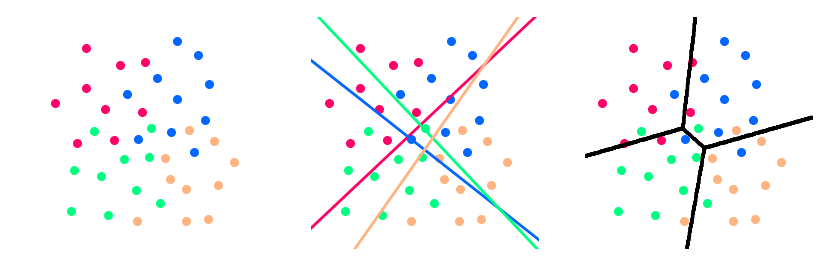

In [11]:
# load data
X,y = load_data('4class_data.csv')

# perform gradient descent on softmax multiclass
alpha = 10**(-2)    # step length, tune to your heat's desire!
W = gradient_descent(X,y,alpha)           # learn all C vs notC separators
plot_all(X,y,W)
plt.show()